# Chicago, IL : Car Crash Analysis & Predictive Modeling


### *Predicting severity of car crashes with Machine Learning Models*

Authors: [Christos Maglaras](mailto:Christo111M@gmail.com), [Marcos Panyagua](mailto:marcosvppfernandes@gmail.com), [Jamie Dowat](mailto:jamie_dowat44@yahoo.com)

Date: 3/12/2021

![chicago](img/chicago_night_drive.jpg)

## Stakeholder: Chicago Department of Transportation

![cdot](img/cdot.png)

### Business Understanding

Just a week ago, the National Security Coundil released a [report](https://www.nsc.org/newsroom/motor-vehicle-deaths-2020-estimated-to-be-highest) containing some disturbing statistics from 2020. The first paragraph begins as follows:
> For the first time since 2007, preliminary data from the National Safety Council show that as many as 42,060 people are estimated to have died in motor vehicle crashes in 2020. That marks an 8% increase over 2019 in a year where people drove significantly less frequently because of the pandemic.

According to their data, the US hasn't seen an increase like this since **1924**.

Following this trend, the **Governor's Highway Safety Association** reported that [*pedestrian* fatality rate](https://www.smartcitiesdive.com/news/ghsa-projects-highest-pedestrian-death-rate-since-1988/573203/) has reached a **30-year high**, with nighttime pedestrian fatalities having increased by 67%, and a 16% increase in daytime fatalities, highlighting the need for *safer road crossings* and increased efforts to make pedestrians and vehicles more *visible*.

Narrowing our focus even further, in **Illinois**, around **1000** people were KILLED in motor vehicle crashes in **2019** alone. 

**Advocates for Highway and Auto Safety** have scored all US states against their [Roadmap for State Highway Safety Laws](https://saferoads.org/wp-content/uploads/2020/01/Advocates-for-Highway-and-Auto-Safety-2020-Roadmap-of-State-Highway-Safety-Laws.pdf), a set of 16 laws that cover occupant protection (selt belt, helmet laws), child protection, and teen driving. 

![scoring](img/scoringsafety.png)

When Illinois is [scored](https://saferoads.org/state/illinois/) against this Roadmap, it has been given a yellow rating (Caution), since it still lacks the following safety laws:

* All-Rider Motorcycle Helmet Law
* Booster Seat Law
* GDL (Graduated Driver's License) – Minimum Age 16 for Learner’s Permit
* GDL – Stronger Nighttime Restriction Provision
* GDL- Stronger Passenger Restriction Provision
* GDL- Age 18 for Unrestricted License

Currently, the Chicago Department of Transportation is working with the city's new initiative, **Vision Zero**, to reduce accidents on the road. In Vision Zero's [report](https://8gq.ef1.myftpupload.com/wp-content/uploads/2016/05/17_0612-VZ-Action-Plan_FOR-WEB.pdf) and action plan, they used crash data to identify high crash corridors in the city as well as other important trends to guide education, road safety improvements, and more.

![quotes](img/visionzeroquotes.png)

Bearing all of this in mind, we had these current safety movements and road safety problems guide our exploration and modeling of this data. 

Even more importantly, this business understanding was the sole influencer of our target choice, *severity of crash based on injury*.

******

## Predictive Modeling Preview

In terms of business problems, we found one of the ways a predictive model could most help with this business problem is to determine how different factors of the crash determine the severity of injuries in the crash.

We compared results from *Logistic Regression, K-Nearest Neighbors, Decision Tree, Naive Bayes, and Random Forest Classifier* models, before settling on our final model produced by a **Bayesian-Optimized XGBoost Classifier**.

We experimented with both a BINARY classification and a TERNARY, with our final model using as TERNARY classification. The targets are defined as follows, using the MOST_SEVERE_INJURY column in the Crashes dataset:

* BINARY:
    * Class 0: No Injury
    * Class 1: Injury
    
* TERNARY
    * Class 0: No Injury
    * Class 1: NON-INCAPACITATING injuries
    * Class 2: INCAPACITATING or FATAL injuries

******

## Data: [Chicago City Data Portal](https://data.cityofchicago.org/)

![ccdp](img/chicagocitydataportal.jpg)

### [Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if):

##### Number of Rows: 482,866

*Shows crash data from crash from the Chicago Police Department's **E-Crash** system*

**"All crashes are recorded as per the format specified in the Traffic Crash Report, SR1050, of the Illinois Department of Transportation."**

| Column Name                 | Description                |
| --------------------------- | -------------------------- |
| crash_record_id  |  Can be used to link to the same crash in the Vehicles and People datasets. |
| rd_no | Chicago Police Department report number|
| crash_date | Date and time of crash as entered by the reporting officer |
| posted_speed_limit  | Posted speed limit, as determined by reporting officer |
| traffic_control_device | Traffic control device present at crash location, as determined by reporting officer (signals, stop sign, etc) |
| device_condition  | Condition of traffic control device, as determined by reporting officer |
| weather_condition | Weather condition at time of crash, as determined by reporting officer |
| lighting_condition | Light condition at time of crash, as determined by reporting officer |
| first_crash_type | Type of first collision in crash |
| trafficway_type  | Trafficway type, as determined by reporting officer |
| lane_ct | Total number of through lanes in either direction, excluding turn lanes, as determined by reporting officer (0 = intersection)|
| alignment | Street alignment at crash location, as determined by reporting officer |
| roadway_surface_cond        | Road surface condition, as determined by reporting officer |
| road_defect | Road defects, as determined by reporting officer |
| crash_type | A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away |
| damage | A field observation of estimated damage. |
| prim_contributory_cause   | The factor which was most significant in causing the crash, as determined by officer judgment |
| sec_contributory_cause | The factor which was second most significant in causing the crash, as determined by officer judgment |
| street_name | Street address name of crash location, as determined by reporting officer|
| num_units | Number of units involved in the crash. A unit can be a motor vehicle, a pedestrian, a bicyclist, or another non-passenger roadway user. Each unit represents a mode of traffic with an independent trajectory. |
| most_severe_injury | Most severe injury sustained by any person involved in the crash |
| injuries_total | Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries as determined by the reporting officer |
| injuries_fatal | Total persons sustaining fatal injuries in the crash |
| injuries_incapacitating | Total persons sustaining incapacitating/serious injuries in the crash as determined by the reporting officer. Any injury other than fatal injury, which prevents the injured person from walking, driving, or normally continuing the activities they were capable of performing before the injury occurred. Includes severe lacerations, broken limbs, skull or chest injuries, and abdominal injuries. |
| injuries_non_incapacitating | Total persons sustaining non-incapacitating injuries in the crash as determined by the reporting officer. Any injury, other than fatal or incapacitating injury, which is evident to observers at the scene of the crash. Includes lump on head, abrasions, bruises, and minor lacerations. |
| crash_hour | The hour of the day component of CRASH_DATE. |
| crash_day_of_week | The day of the week component of CRASH_DATE. Sunday=1 |
| latitude | The latitude of the crash location, as determined by reporting officer, as derived from the reported address of crash |
| longitude | The longitude of the crash location, as determined by reporting officer, as derived from the reported address of crash |


### [People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d):

##### Number of Rows: 1,068,637

*Information about people involved in a crash and if any injuries were sustained.*

| Column Name                 | Description                |
| --------------------------- | -------------------------- |
| crash_record_id | This number can be used to link to the same crash in the Crashes and Vehicles datasets. This number also serves as a unique ID in the Crashes dataset. |
| person_type | Type of roadway user involved in crash |
| rd_no | Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes. |
| crash_date | Date and time of crash as entered by the reporting officer |
| seat_no | Code for seating position of motor vehicle occupant: 1= driver, 2= center front, 3 = front passenger, 4 = second row left, 5 = second row center, 6 = second row right, 7 = enclosed passengers, 8 = exposed passengers, 9= unknown position, 10 = third row left, 11 = third row center, 12 = third row right |
| city | City of residence of person involved in crash |
| state | State of residence of person involved in crash |
| zipcode | ZIP Code of residence of person involved in crash |
| sex | Gender of person involved in crash, as determined by reporting officer |
| age | Age of person involved in crash |
| drivers_license_state | State issuing driver's license of person involved in crash |
| drivers_license_class | Class of driver's license of person involved in crash |
| safety_equipment | Safety equipment used by vehicle occupant in crash, if any |
| airbag_deployed | Whether vehicle occupant airbag deployed as result of crash |
| ejection | Whether vehicle occupant was ejected or extricated from the vehicle as a result of crash |
| injury_classification | Severity of injury person sustained in the crash |
| driver_action | Driver action that contributed to the crash, as determined by reporting officer |
| driver_vision | What, if any, objects obscured the driver’s vision at time of crash |
| physical_condition | Driver’s apparent physical condition at time of crash, as observed by the reporting officer |
| pedpedal_action | Action of pedestrian or cyclist at the time of crash |
| pedpedal_visibility | Visibility of pedestrian of cyclist safety equipment in use at time of crash |
| pedpedal_location | Location of pedestrian or cyclist at the time of crash |
| bac_result | Status of blood alcohol concentration testing for driver or other person involved in crash |
| bac_result value | Driver’s blood alcohol concentration test result (fatal crashes may include pedestrian or cyclist results) |
| cell_phone_use | Whether person was/was not using cellphone at the time of the crash, as determined by the reporting officer |

### [Vehicles](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3):

##### Number of Rows: 987,148

*Information about vehicles ("units") involved in a traffic crash.*

| Column Name                 | Description                |
| --------------------------- | -------------------------- |
| crash_record_id | This number can be used to link to the same crash in the Crashes and People datasets. This number also serves as a unique ID in the Crashes dataset. |
| rd_no | Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes. |
| crash_date | Date and time of crash as entered by the reporting officer |
| unit_type | The type of unit (i.e Driver, parked, pedestrian, bicycle, etc) |
| num_passengers | Number of passengers in the vehicle. The driver is not included. More information on passengers is in the People dataset. |
| make | The make (brand) of the vehicle, if relevant |
| model | The model of the vehicle, if relevant |
| lic_plate_state | The state issuing the license plate of the vehicle, if relevant |
| vehicle_year | The model year of the vehicle, if relevant |
| vehicle_defect | Indicates part of car containing defect (brakes, wheels, etc.) |
| vehicle_type | The type of vehicle, if relevant (passenger, truck, bus, etc) |
| vehicle_use | The normal use of the vehicle, if relevant |
| maneuver | The action the unit was taking prior to the crash, as determined by the reporting officer |
| towed_I | Indicator of whether the vehicle was towed |
| occupant_cnt | The number of people in the unit, as determined by the reporting officer |
| exceed_speed_limit_I | Indicator of whether the unit was speeding, as determined by the reporting officer |
| first_contact_point | Indicates orientation on car that was hit (front, rear, etc) |



#### Loading in our data...

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [2]:
crashes = pd.read_csv('data/traffic_crashes_chicago.csv', low_memory=False)

In [3]:
people = pd.read_csv('data/traffic_crashes_people.csv', low_memory=False)

In [4]:
vehicles = pd.read_csv('data/traffic_crashes_vehicles.csv', low_memory=False)

## Exploratory Data Analysis (EDA)

In [5]:
from src import data_cleaning

As you might have seen above, this data is rife with repetitive columns or columns with no analytical value (like RD_NO). The following function subsets the original dataset with only the columns we'll use for our EDA.

In [6]:
crashes, people, vehicles = data_cleaning.column_mask([crashes, people, vehicles])

In [7]:
from src import eda
%matplotlib inline

In [8]:
crashes.columns

Index(['crash_record_id', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'alignment',
       'roadway_surface_cond', 'road_defect', 'crash_type', 'damage',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_name',
       'num_units', 'most_severe_injury', 'injuries_total', 'crash_hour',
       'crash_day_of_week', 'latitude', 'longitude'],
      dtype='object')

In [9]:
people.columns

Index(['crash_record_id', 'person_type', 'sex', 'age', 'safety_equipment',
       'airbag_deployed', 'ejection', 'injury_classification', 'driver_action',
       'driver_vision', 'physical_condition', 'pedpedal_action',
       'pedpedal_visibility', 'pedpedal_location', 'bac_result',
       'bac_result value', 'cell_phone_use'],
      dtype='object')

We went through each variable and looked at the distribution. Here are some of our graphs!
******

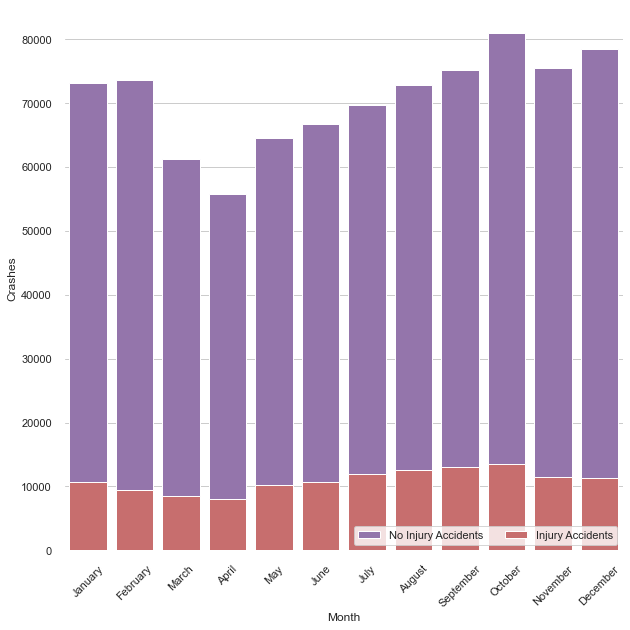

In [10]:
eda.crashes_by_month(crashes)

This graph definitely matches our intuition-- the are highest incidences of crashes occur during rush hour; this could be due to more traffic, eager to get home, etc...

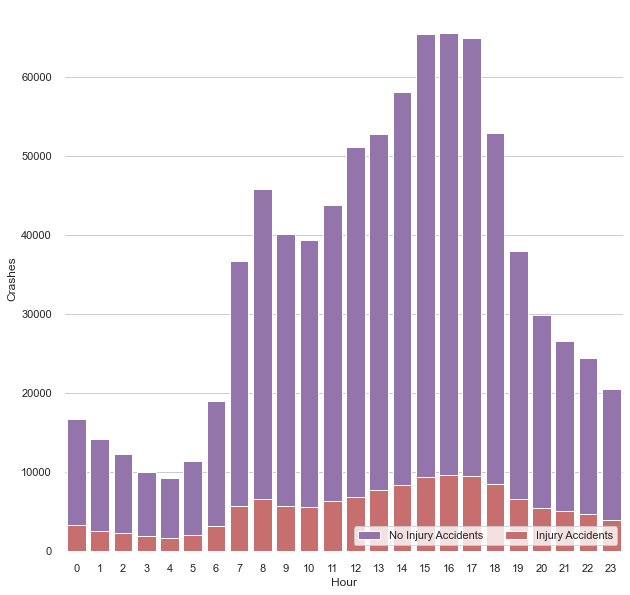

In [11]:
eda.crashes_by_hour(crashes)

Main Takeaway: **Friday** has the highest incidences of crashes

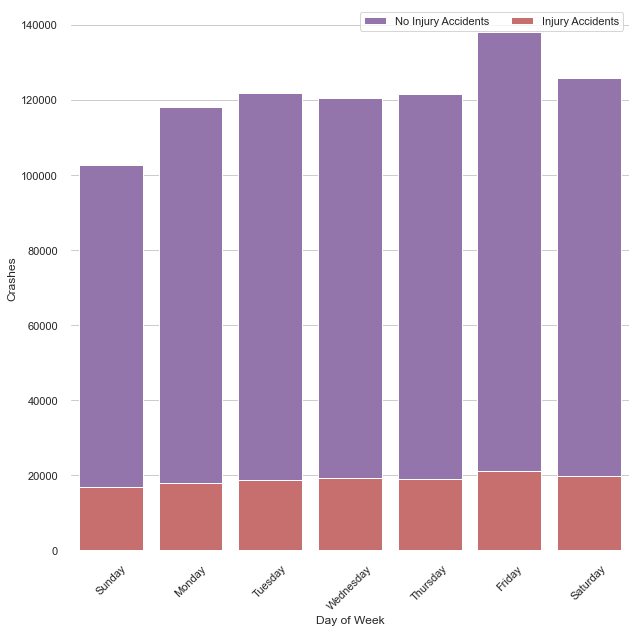

In [12]:
eda.crashes_by_day(crashes)

Main takeaway: **Ages 22-30** have the highest number of car crash reports. 
> **IMPORTANT NOTE:** This graph's main purpose is to showcase the distribution of our features. From a car crash perspective we expected there to be more crashes for newer drivers (16-21), but this graph doesn't accomodate for demographic trends in Chicago, which may be causing some of the variance in this distribution.

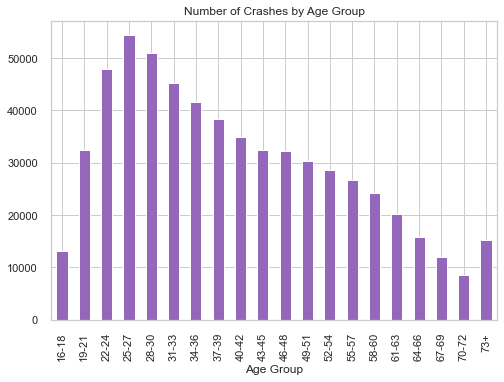

In [13]:
eda.crashes_by_age(people)

Main takeaways: 
1. Bicyclists have the highest number of crashes when cyclist was with **traffic** or **crossing the road**. This matches our research (see above); the National Security Council reported growing indicendence in **pedestrian** and **motor vehicle fatalities**. Click on [this article](https://www.smartcitiesdive.com/news/calls-for-safer-streets-intensify-amid-45-spike-in-pedestrian-deaths/596420/) to learn more!
2. The third most common value is **UNKNOWN/NA**. This is a pattern we saw in many columns and will seek to eliminate, as we concluded this would hurt our model's performance.

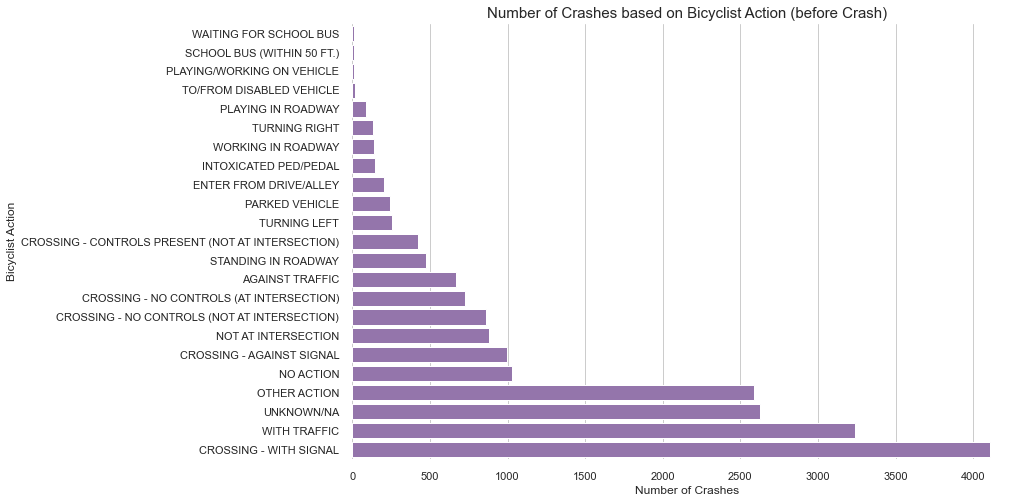

In [14]:
eda.crashes_by_pedpedal_action(people)

Main takeaway: Most reported crashes have an estimated damage of **over 1500 dollars**. 

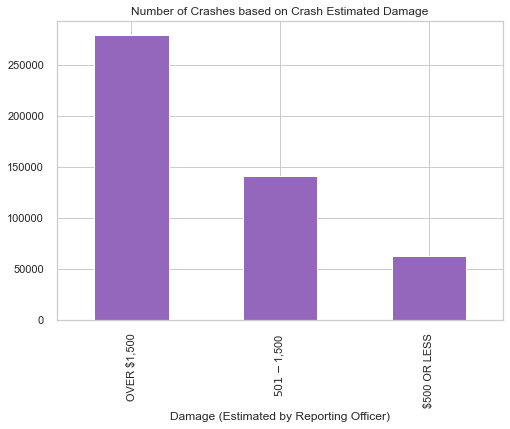

In [15]:
eda.crashes_by_damage(crashes)

Main takeaway: Most crashes in this dataset occurred during the day.

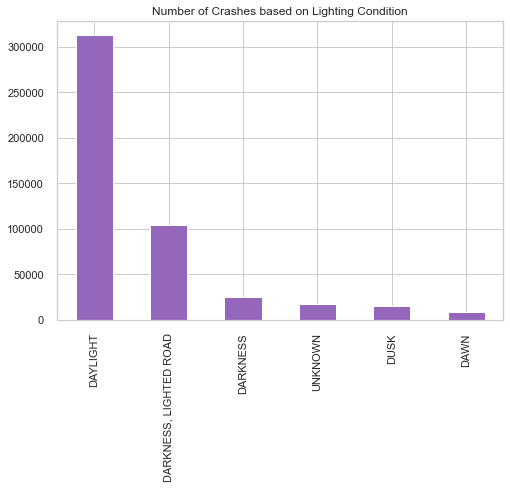

In [16]:
eda.crashes_by_lighting_condition(crashes)

To clarify, this graph shows the distribution of *successful vs unsuccessful airbag deployment* (these are crashes where airbag should be deployed).

Main takeaway: HUGE disparity between successfully deployed airbags and unsuccessful deployment.

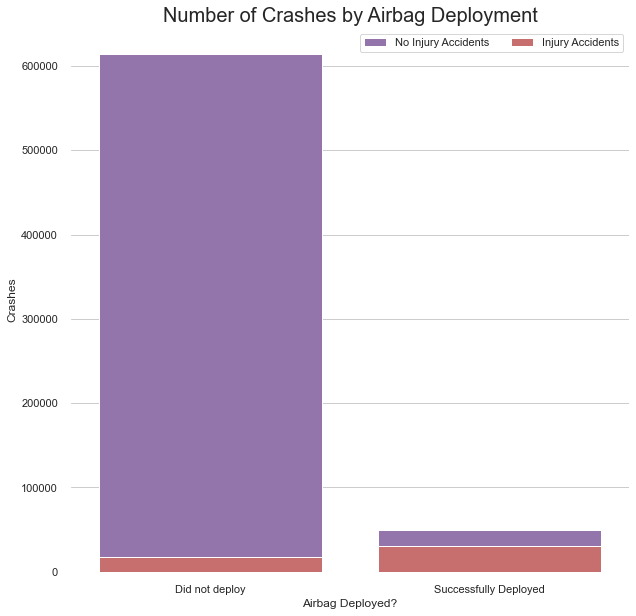

In [17]:
eda.airbag_deployment(people)

Main takeaway: Significant disparity in crash incidences between **Male** and **Female**. May serve as a helpful predictor in our model.

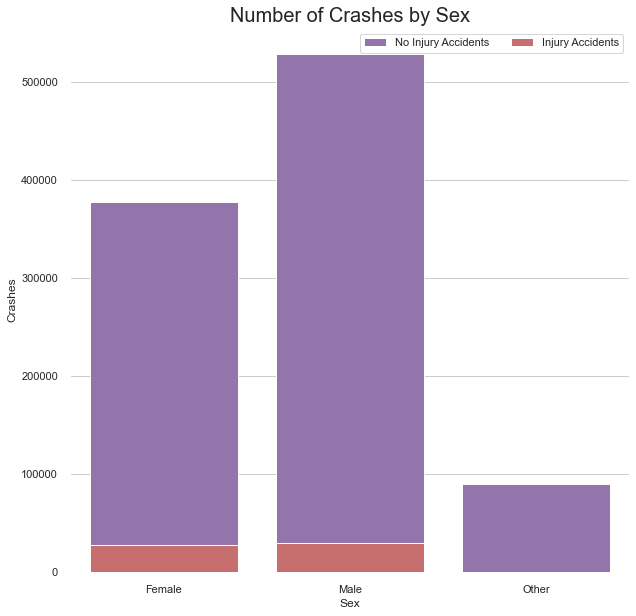

In [18]:
eda.crashes_by_sex(people)

Main Takeaway: **Location, Location, Location!!** This distribution verifies a possible contributor to crashes - **traffic congestion**.

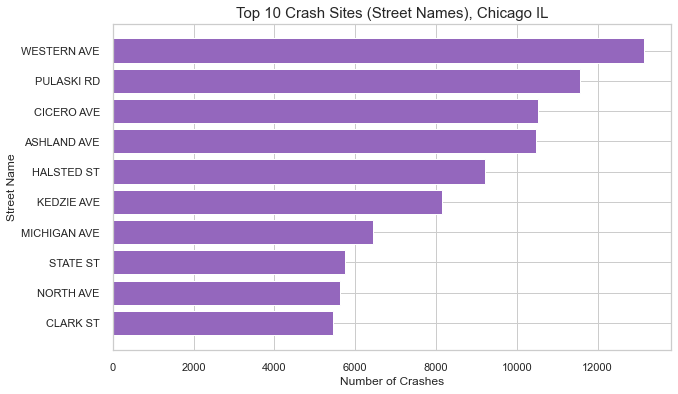

In [19]:
eda.top_10_crash_sites(crashes)

Main takeaways: 
* Significantly more crash incidences where driver vision was **NOT** impaired.
* Yet again, we see a high incidence of **UNKNOWN** values.

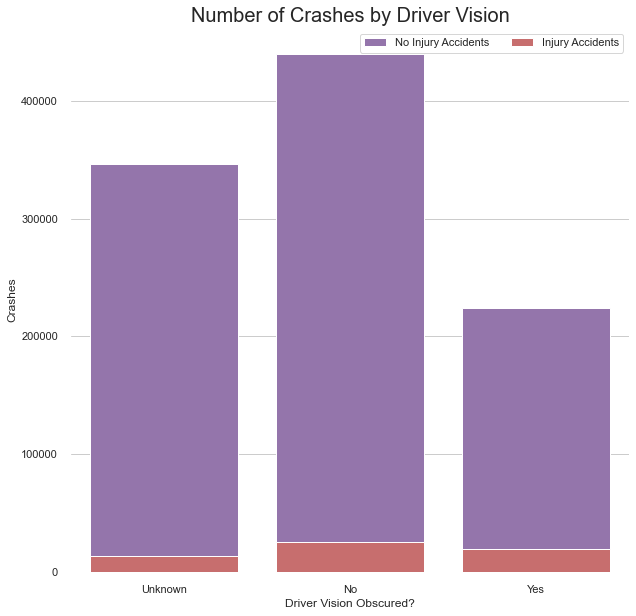

In [20]:
eda.driver_vision(people)

Main takeaway: Winning by a significant majority, looks like the primary offense in our crash data is **FAILING TO YIELD**.

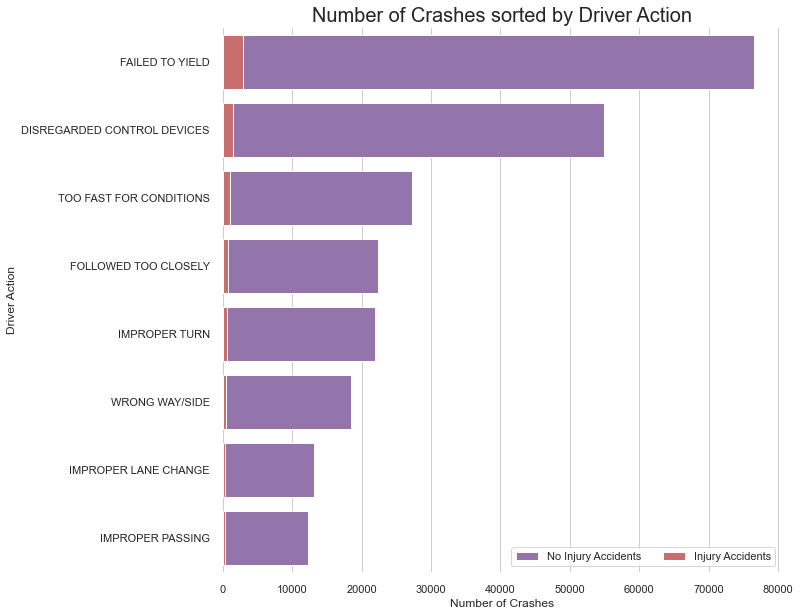

In [21]:
eda.driver_action(people)

Main Takeaway: This is not looking like it will serve as a helpful predictor with the HUGE presence of "UNKNOWN" values.

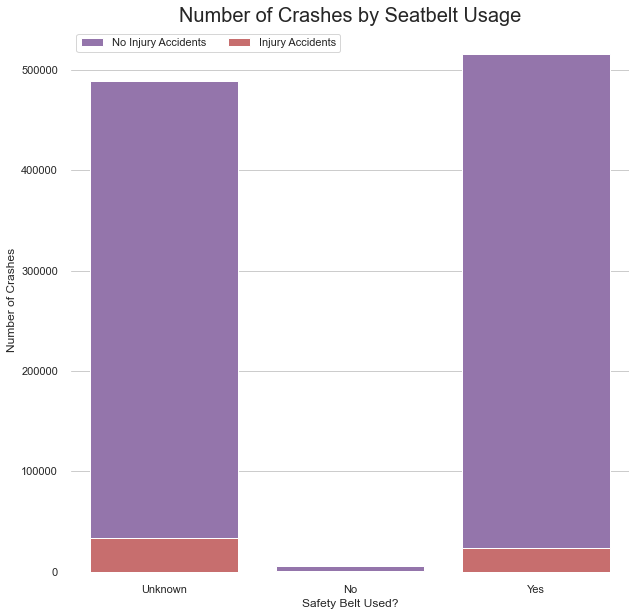

In [22]:
eda.seatbelt_used(people)

## Predictive Modeling

### TARGET: Severity of Crash

* BINARY:
    * Class 0: No Injury
    * Class 1: Injury
    
* TERNARY
    * Class 0: No Injury
    * Class 1: NON-INCAPACITATING injuries
    * Class 2: INCAPACITATING or FATAL injuries
    
********

Now, it's time to start modeling! As stated at the beginning, the target we decided had the most real-world value was **injury**. 

In terms of our data, we used the **MOST_SEVERE_INJURY** column in the Crashes dataset to represent the target.

However, using Injury as a target proved to have a major problem: ***severe class imbalance***. 

Bearing this in mind, we explored both binary and ternary classification models to see which one could best explain this data.

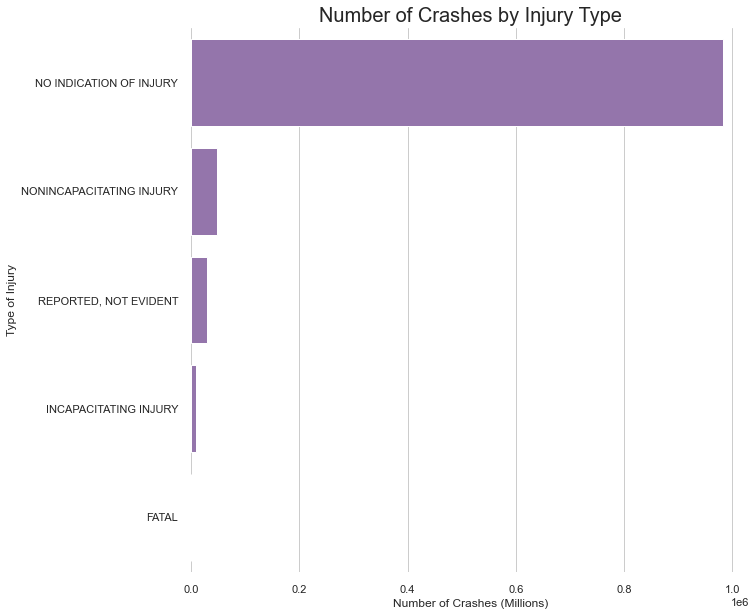

In [23]:
eda.class_imbalance(people)

### Modeling Data Prep - BINARY Classification

As seen above, we have an incredible amount of repetitive features and "UNKNOWN" values we have to accomodate for before we start modeling. Here is a list of relevant features we ultimately decided **NOT** to use in our model:

In [24]:
from src import models

In [25]:
# crash_mod = models.model_mask_binary(crashes)

In [26]:
# pp = models.Preprocessor(target_col_name = 'injured', df=crash_mod)

In [27]:
# target_split = pp.target_split([crash_mod])

In [28]:
# tr_te_split = pp.split_train_test(target_split)

#### Modeling - Imports

If you do not have xgboost (if the import cell below breaks because of xgboost), you can download it by running the following command:

In [29]:
# !pip install xgboost

If xgboost is still not working, you may need to uncomment and run the code below:

In [30]:
# !brew install libomp

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

The `tr_te_split` value is a **list of dictionaries**, containing X_train and y_train data for **4** differenct train sizes: 


|Index           |Train Size Proportion |
|----------------|----------------------|
| tr_te_split[0] | 0.5                  |
| tr_te_split[1] | 0.6                  |
| tr_te_split[2] | 0.75                 |
| tr_te_split[3] | 0.8                  |

In [32]:
# X_train = tr_te_split[2]['train']['X']

# y_train = tr_te_split[2]['train']['y']

### First Simple Model: BINARY Classification

For each of our models, we are going to score using **Stratified K-Fold Cross Validation**. Stratified was chosen over regular K-folds due to major class imbalance. *Number of folds = 5* 

In [33]:
# lr = LogisticRegression(max_iter=100000, C=0.05)

In [34]:
# rec, prec, acc, roc_auc, clf = models.kfold_validation(X_train, y_train, classifier=lr, 
#                         continuous_cols=['crash_hour'], 
#                         categorical_cols=tr_te_split[0]['train']['X'].drop(labels=['crash_hour'], axis=1).columns, 
#                         smote=False,
#                         minority_size=0.7, 
#                         majority_reduce=0.7)

In [35]:
# score_names = ['Recall', 'Precision', 'Accuracy', 'ROC-AUC']

# for name, score in list(zip(score_names,[rec, prec, acc, roc_auc])):
#     print(name, '\n', np.mean(score), '\n')

In [36]:
# lr2 = LogisticRegression(max_iter=100000, C=0.05)

In [37]:
# rec, prec, acc, roc_auc, clf = models.kfold_validation(X_train, y_train, classifier=lr2, 
#                         continuous_cols=['crash_hour'], 
#                         categorical_cols=tr_te_split[0]['train']['X'].drop(labels=['crash_hour'], axis=1).columns, 
#                         smote=True,
#                         minority_size=0.7, 
#                         majority_reduce=0.7)

In [38]:
# for name, score in list(zip(score_names,[rec, prec, acc, roc_auc])):
#     print(name, '\n', np.mean(score), '\n')

In [39]:
# rfc = RandomForestClassifier(n_estimators=100, class_weight={0:1, 1:6})


In [40]:
# rec, prec, acc, roc_auc, clf = models.kfold_validation(X_train, y_train, classifier=rfc, 
#                         continuous_cols=['crash_hour'], 
#                         categorical_cols=tr_te_split[0]['train']['X'].drop(labels=['crash_hour'], axis=1).columns, 
#                         smote=False,
#                         minority_size=0.7, 
#                         majority_reduce=0.7)

In [41]:
# for name, score in list(zip(score_names,[rec, prec, acc, roc_auc])):
#     print(name, '\n', np.mean(score), '\n')

In [42]:
# gnb = GaussianNB()

In [43]:
# rec, prec, acc, roc_auc, clf = models.kfold_validation(X_train, y_train, classifier=gnb, 
#                         continuous_cols=['crash_hour'], 
#                         categorical_cols=tr_te_split[0]['train']['X'].drop(labels=['crash_hour'], axis=1).columns, 
#                         smote=True,
#                         minority_size=0.7, 
#                         majority_reduce=0.7)

In [44]:
# for name, score in list(zip(score_names,[rec, prec, acc, roc_auc])):
#     print(name, '\n', np.mean(score), '\n')

In [45]:
# xgb = XGBClassifier()

In [46]:
# rec, prec, acc, roc_auc, clf = models.kfold_validation(X_train, y_train, classifier=xgb, 
#                         continuous_cols=['crash_hour'], 
#                         categorical_cols=tr_te_split[0]['train']['X'].drop(labels=['crash_hour'], axis=1).columns, 
#                         smote=True,
#                         minority_size=0.7, 
#                         majority_reduce=0.7)

In [47]:
# for name, score in list(zip(score_names,[rec, prec, acc, roc_auc])):
#     print(name, '\n', np.mean(score), '\n')

### Modeling Data Prep: TERNARY Classification

In [1]:
import pandas as pd

In [2]:
crashes_tern = pd.read_csv('data/traffic_crashes_chicago.csv', low_memory=False)

In [3]:
people_tern = pd.read_csv('data/traffic_crashes_people.csv', low_memory=False)

In [4]:
vehicles_tern = pd.read_csv('data/traffic_crashes_vehicles.csv', low_memory=False)

In [5]:
from src import models

In [6]:
tern_df, categorical_cols, numerical_cols = models.model_mask_ternary(crashes_tern, people_tern, vehicles_tern)

In [7]:
tern_df.isna().sum()

UNIT_TYPE                  0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
TRAVEL_DIRECTION           0
MANEUVER                   0
FIRST_CONTACT_POINT        0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
REPORT_TYPE                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
STREET_DIRECTION           0
PERSON_TYPE                0
STATE                      0
SEX                        0
SAFETY_EQUIPMENT           0
AIRBAG_DEPLOYED            0
EJECTION                   0
DRIVER_ACTION              0
DRIVER_VISION              0
PHYSICAL_CONDITION         0
BAC_RESULT                 0
MOST_SEVERE_INJURY         0
dtype: int64

In [8]:
pp = models.Preprocessor(target_col_name = 'MOST_SEVERE_INJURY', df=tern_df)

In [9]:
target_split = pp.target_split([tern_df])

In [10]:
tr_te_split = pp.split_train_test(target_split)

In [17]:
prepped_data = pp.scale_and_ohe(tr_te_split, numerical_cols, categorical_cols[:32])

### Ternary Classification: Using XGBoost with Bayesian Optimization

In [ ]:
# !pip install bayesian-optimization

In [20]:
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [21]:
X_train = prepped_data[2]['train']['X']

y_train = prepped_data[2]['train']['y']

X_test = prepped_data[2]['test']['X']

y_test = prepped_data[2]['test']['y']

In [22]:
D_train = xgb.DMatrix(X_train, label=y_train)

In [26]:
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate, scale_pos_weight, min_child_weight, colsample_bytree):
    params = {'max_depth'       : int(max_depth),
              'gamma'           : gamma,
              'n_estimators'    : int(n_estimators),
              'learning_rate'   : learning_rate,
              'subsample'       : 0.8,
              'eval_metric'     : 'rmse',
              'min_child_weight': min_child_weight,
              'scale_pos_weight': scale_pos_weight,
              'colsample_bytree': colsample_bytree}
    cv_result = xgb.cv(params, D_train, num_boost_round=200, nfold=5)
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [27]:
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth' : (3, 15),
                        'gamma' : (0, 2),
                        'learning_rate'    : (0,1),
                        'n_estimators'     : (100,400),
                        'scale_pos_weight' : (5,10),
                        'min_child_weight' : (1,10),
                        'colsample_bytree' : (0,1)})

In [ ]:
# WARNING: please DO NOT run the cell below unless you want enough time to get up,
# take a shower, go for a walk, eat dinner, call an old friend, and binge the entirety
# of 'Days of Our Lives'.

In [ ]:
xgb_bo.maximize(n_iter=10, init_points=12, acq='ei')

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... |
-------------------------------------------------------------------------------------------------------------
[22:38:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:38:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:38:42] WARNING: /Users/travis/build/dmlc/xgboost/src

In [ ]:
params = xgb_bo.max['params']
print(params)

In [ ]:
xgb_opt = XGBClassifier(**params)

In [ ]:
rec, prec, acc, roc_auc, fit_obj = models.kfold_validation(X_train, y_train, classifier=xgb, 
                        continuous_cols=['crash_hour'], 
                        categorical_cols=tr_te_split[0]['train']['X'].drop(labels=['crash_hour'], axis=1).columns, 
                        smote=True,
                        minority_size=0.7, 
                        majority_reduce=0.7)

In [ ]:
for score in [rec, prec, acc, roc_auc]:
    print(score)

#### Final Confusion Matrix TRAINING DATA:

![final_cm](img/finalmodeltraincm.png)


#### Final Confusion Matrix TEST DATA:


![final_cm_test](img/finalmodeltestcm.png)

## Next Steps

* Find a way to automate optimization of feature selection AND engineering (trying different combinations of different versions of features)

* Subset the data and create different types of models. There were columns that were removed because they contained too many NaN values in the context of the entire dataset, but still has thousands of entries:
    * Predicting crash injury for **Pedestrians only**
    * Predicting crash injury for certain **age groups**
    * Predicting crash injury based on **cell phone use**


## Sources

##### Source Code
* [Changing font size for Confusion Matrix](https://stackoverflow.com/questions/59839782/confusion-matrix-font-size)
*[SMOTE-ing Data Tutorial](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
*[Bayesian Optimization: A Beginner's Guide](https://analyticsindiamag.com/implementing-bayesian-optimization-on-xgboost-a-beginners-guide/)
* Source code for this notebook can be found in the **src** folder.

##### Business Understanding

* [Speeding Increases During Pandemic, Prompting Safety Groups To Take Action](http://www.ghsa.org/about/news/Forbes/Speed-Pilot21)
* [Calls for safer streets intensify amid 45% spike in pedestrian deaths](https://www.smartcitiesdive.com/news/calls-for-safer-streets-intensify-amid-45-spike-in-pedestrian-deaths/596420/)
* [Chicago unveils its West Side Vision Zero Traffic Safety Plan](https://chi.streetsblog.org/2019/09/12/the-city-of-chicago-unveils-its-west-side-vision-zero-traffic-safety-plan/)
* [Vision Zero Chicago Webpage](https://visionzerochicago.org/what-is-vision-zero/)